In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from math import factorial

In [2]:
x=sympy.symbols('x')
y=sympy.Function('y')(x)

x0=0.5       #Начальные данные
y0=1
h=0.1
yl=[] 
XX=[x0] 
YY=[] 

In [3]:
def Idif(func): # Функция для подсчёта производной неявно заданной функции 
    f=sympy.idif(func,y,x)
    return f

def Sympy(f,XX,YY): 
    f=sympy.Add(f)
    f=f.subs({x:XX,y:YY})
    return float(f)

def Teylor(y1,y2,x): #Разложение функции в ряд Тейлора 
    T = 1+h*y1/(factorial(1))*(x-0.5)+(h/2)*y2/(factorial(2))*(x-0.5)**2
    return T

In [4]:
func=-x*(y**4+1)/(2*(x*y+y)) #Первая производная
val=Sympy(func,x0,y0)
yl.append(val)
func1=Idif(func) #Вторая производная
val=Sympy(func1,x0,y0)
yl.append(val)
y0=Teylor(yl[0],yl[1],x0)
YY.append(y0)

In [ ]:
while abs(x0)<2:
    x0=x0+h 
    XX.append(x0)
    y0=Teylor(yl[0],yl[1],x0)
    YY.append(y0)
    val=Sympy(func,x0,y0) 
    yl[0]=val
    val=Sympy(func1,x0,y0) 
    yl[1]=val

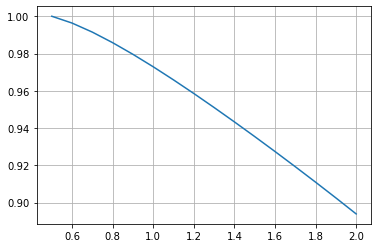

In [5]:
plt.plot(XX,YY)
plt.grid()